In [15]:
from scipy.stats import expon
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np
import math
plt.style.use('alex')

The Exponential Distribution has as it's only parameter a rate, $\lambda$, which determines the shape of the distribution.  I find this a bit peculiar because then shape of your distribution is simply relative to the units which you have chosen to work in.  For example if your domain is time, then you could have your rate be in units of seconds, minutes, hours, or even per-10-seconds, per-half-hour, and so on, so much that you could obtain any shaped exponential distribution from any scenario, if you pick your units suitably.

- We will begin by looking at a variety of exponential distributions for different values of $\lambda$
- Then we will demonstrate how the exponential distribution is a limiting case of the Geometric Distribution
- And then we will end with a demonstration on how the sum of $n$ iid exponential distributions has a Gamma distribution

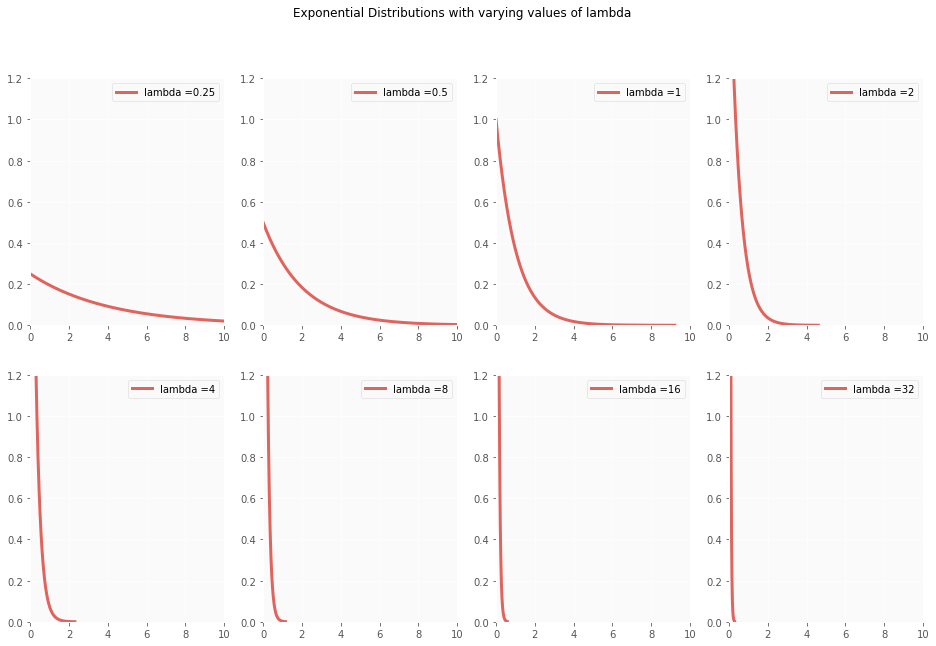

In [2]:
lams = [0.25,0.5,1,2,4,8,16,32]

cols = 4
rows = 2 

fig, ax = plt.subplots(rows,cols,figsize=(16,10))

iterator = 0;

for i in range(rows):
    for j in range(cols):
        
        lam = lams[iterator]
        x_space = np.linspace(expon.ppf(0.0001, scale = 1/lam), expon.ppf(0.9999, scale = 1/lam), 1000)
    
        ax[i,j].plot(x_space, expon.pdf(x_space, scale = 1/lam),
                    lw=3, alpha=0.8, label = 'lambda ={}'.format(lam))
        ax[i,j].legend()
        ax[i,j].set_xlim(0,10)
      
        ax[i,j].set_ylim(0,1.2)
        iterator = iterator + 1
plt.suptitle('Exponential Distributions with varying values of lambda')
plt.legend()
plt.show()

We could alternatively plot them all on the same axes

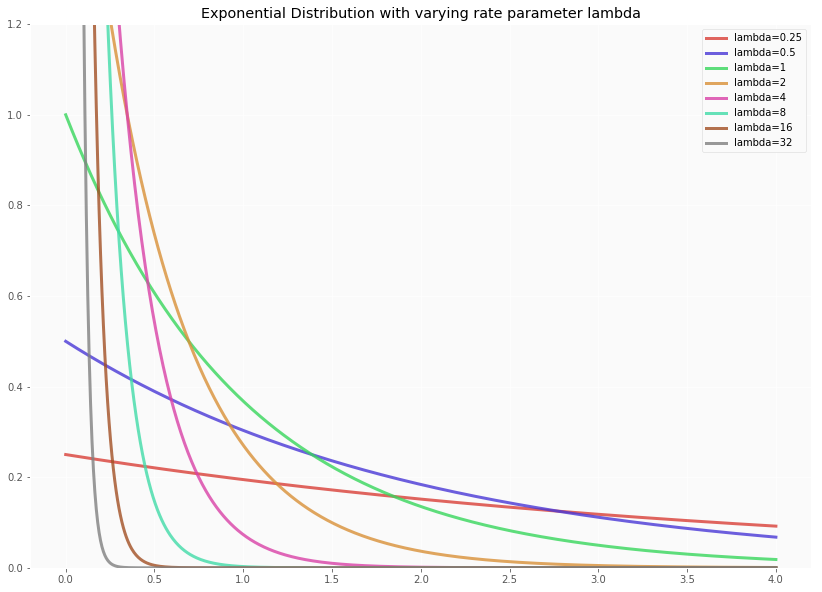

In [3]:
lams = [0.25,0.5,1,2,4,8,16,32]
x_space = np.linspace(0,4,1000)

fig, ax = plt.subplots(figsize=(14,10))

for lam in lams:
    
    ax.plot(x_space, expon.pdf(x_space, scale = 1/lam),
                              lw=3, alpha = 0.8, label = 'lambda={}'.format(lam))
    
plt.ylim(0,1.2)
plt.legend()
plt.title('Exponential Distribution with varying rate parameter lambda')
plt.show()



- Now we will take a look to see how the exponential distribution relates to the geometric distribution

- If a Y has an Exponential Distribution with rate parameter $\lambda$ then $ X=\left \lfloor Y \right \rfloor$ will be a Geometric distribution with parameter $p=1-e^{-\lambda}$

In [32]:
lams = [0.25,0.5,1,2]
ps = [(1- np.exp(-lam)) for lam in lams]
ps

[0.22119921692859512,
 0.39346934028736658,
 0.63212055882855767,
 0.8646647167633873]

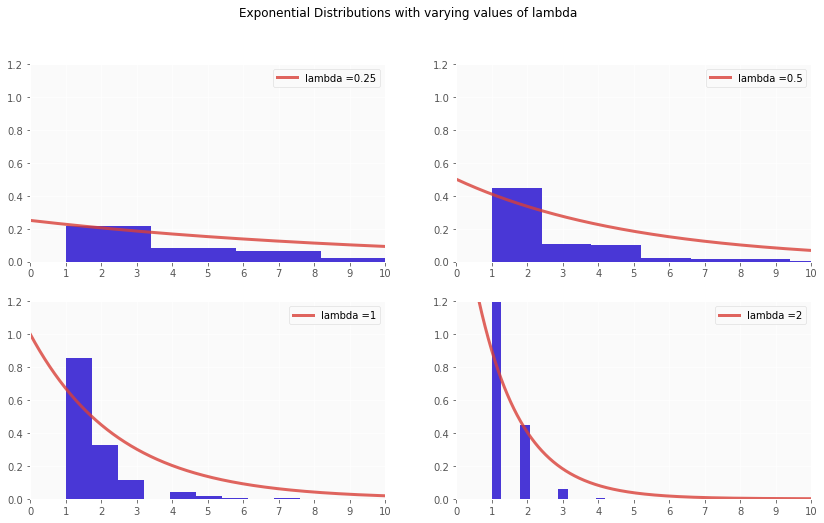

In [35]:
lams = [0.25,0.5,1,2]
ps = [1- np.exp(-lam) for lam in lams]
exp_x_space = np.linspace(0,10,1000)
geom_x_space = np.arange(1,11,1)

cols = 2
rows = 2 

fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(14,8))

iterator = 0
for i in range(rows):
    for j in range(cols):
        
        lam = lams[iterator]
        p = ps[iterator]
    
        ax[i,j].plot(exp_x_space, expon.pdf(x_space, scale = 1/lam),
                    lw=3, alpha=0.8, label = 'lambda ={}'.format(lam))
        ax[i,j].hist(geom.rvs(p=p, size=10000), normed=True, bins=15)
        ax[i,j].legend()
        ax[i,j].set_xlim(0,10)
        ax[i,j].set_xticks(np.arange(0,11))
        ax[i,j].set_ylim(0,1.2)
        iterator = iterator + 1
plt.suptitle('Exponential Distributions with varying values of lambda')
plt.legend()
plt.show()

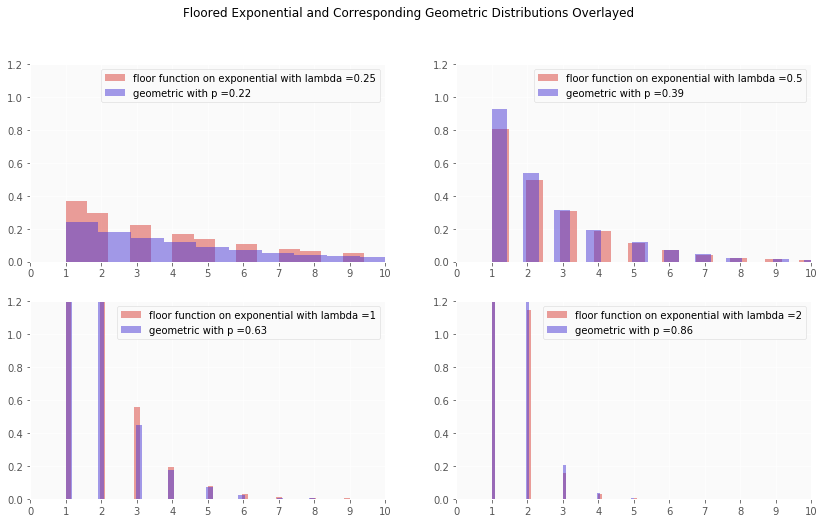

In [68]:
lams = [0.25,0.5,1,2]
ps = [1- np.exp(-lam) for lam in lams]
exp_x_space = np.linspace(0,10,1000)
geom_x_space = np.arange(1,11,1)

cols = 2
rows = 2 

fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(14,8))

iterator = 0
for i in range(rows):
    for j in range(cols):
        
        lam = lams[iterator]
        p = ps[iterator]
    
        ax[i,j].hist([math.floor(x) for x  in expon.rvs(scale = 1/lam, loc= 1 , size = 10000)],
                     normed=True,
                     alpha= 0.5,
                     bins = 50,
                     align = 'mid',
                     label = 'floor function on exponential with lambda ={}'.format(lam))
        ax[i,j].hist(list(geom.rvs(p=p, size=10000)),
                     normed=True,
                     bins=50,
                     alpha = 0.5,
                     align = 'mid',
                     label = 'geometric with p ={:,.2f}'.format(p))
        
        ax[i,j].set_xlim(0,10)
        ax[i,j].set_xticks(np.arange(0,11))
        ax[i,j].set_ylim(0,1.2)
        ax[i,j].legend()
        iterator = iterator + 1
plt.suptitle('Floored Exponential and Corresponding Geometric Distributions Overlayed')
plt.show()

- Now we will see how the sum of iid exponential rv's has a Gamma distribution

In [69]:
from scipy.stats import gamma

In [71]:
expon.rvs(scale=1/lam, size=100)

array([ 0.411163  ,  0.40230443,  0.43632161,  0.11199321,  1.26339995,
        0.40135445,  0.76300907,  0.19991613,  0.71950752,  0.24406212,
        0.07941928,  0.44830959,  0.31616518,  0.14389695,  0.58379633,
        1.49227212,  0.86404861,  0.66856435,  0.37870046,  0.6771904 ,
        0.19699939,  0.45956286,  0.12574378,  0.50540823,  0.10717982,
        1.65339228,  1.9391078 ,  0.02597636,  0.17136343,  0.43741832,
        0.3603565 ,  0.72895541,  0.79779148,  0.54860014,  0.31835005,
        0.15031299,  0.21680648,  0.09977109,  0.45815404,  0.07448693,
        1.06552065,  1.35350494,  1.67997045,  0.4303476 ,  0.39923083,
        0.09058716,  0.20404159,  0.0415781 ,  0.26329679,  1.90775028,
        0.06234629,  0.46493612,  0.08573586,  0.73700507,  0.83011463,
        0.24578921,  0.09219767,  0.40523731,  0.12479715,  0.58905371,
        1.08025988,  2.18050962,  0.13867911,  0.28939732,  0.73550401,
        0.6932478 ,  0.49717879,  0.87563726,  1.5327093 ,  0.08

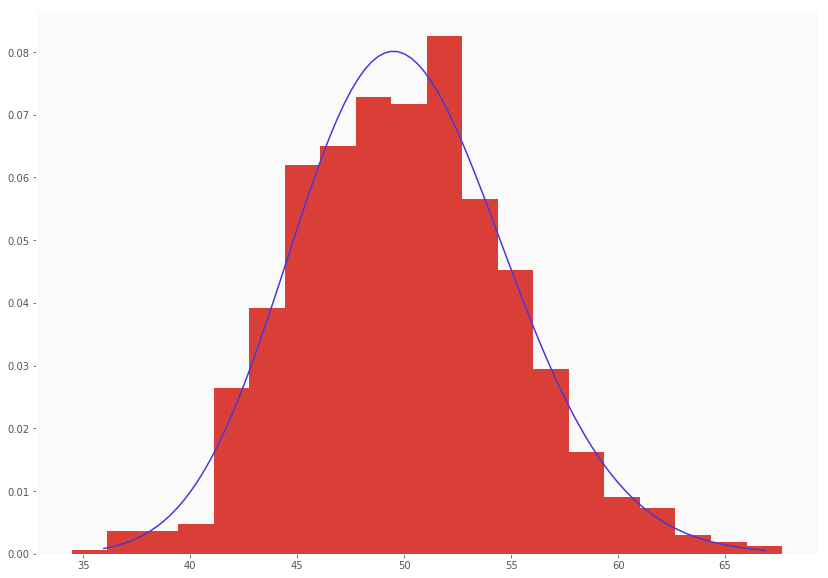

In [105]:
sums_of_exps = []
n_samples = 1000
sample_size = 100

gamma_x_space = np.linspace(gamma.ppf(0.001,a=sample_size, scale = 1/lam),
           gamma.ppf(0.999,a=sample_size, scale = 1/lam),
           100)

for i in range(n_samples):
    RVs = expon.rvs(scale=1/lam, size=100)
    sums_of_exps.append(sum(RVs))
    
fig,ax = plt.subplots(figsize=(14,10))

ax.hist(sums_of_exps, normed=True, bins=20)
ax.plot(gamma_x_space, gamma.pdf(x=gamma_x_space, a=sample_size, scale = 1/lam ))

ax.plot()
plt.show()


In [102]:
lam

2

2

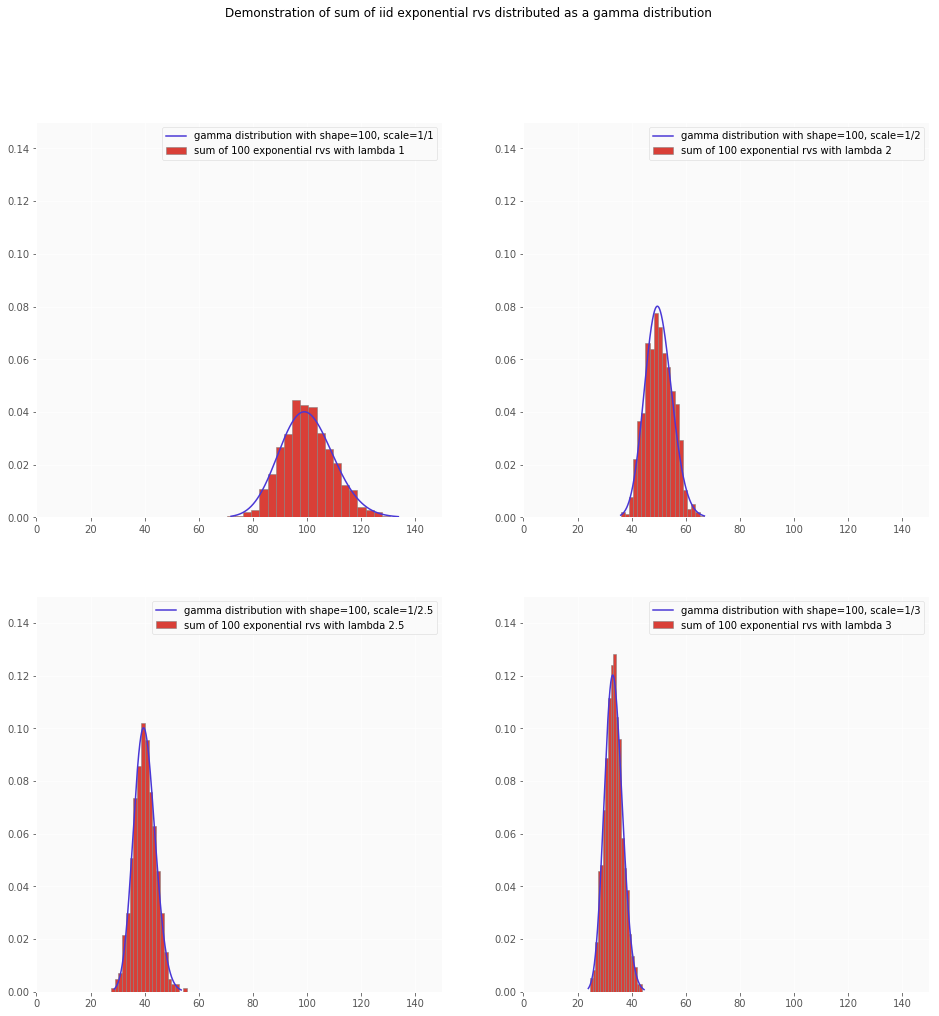

In [150]:
a = 100
lams = [1,2,2.5,3]

n_samples = 1000
sample_size = 100

rows=2
cols=2

fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,16))
iterator = 0
for i in range(rows):
    for j in range(cols):
        lam = lams[iterator]
        
        sums_of_exps = []
        for rv in range(n_samples):
            RVs = expon.rvs(scale=1/lam, size=100)
            sums_of_exps.append(sum(RVs))
        ax[i,j].hist(sums_of_exps, normed=True, bins=20, edgecolor='gray'
                     , label = 'sum of {} exponential rvs with lambda {}'.format(sample_size,lam))
        
        
        x_gamma_space = np.linspace(gamma.ppf(0.001,a=sample_size, scale = 1/lam ),
                   gamma.ppf(0.999,a=sample_size, scale = 1/lam ),
                   1000)
        ax[i,j].plot(x_gamma_space, gamma.pdf(x=x_gamma_space, a=sample_size, scale = 1/lam),
                                             label = 'gamma distribution with shape={}, scale=1/{}'.format(sample_size,lam))
        ax[i,j].set_xlim(0,150)
        ax[i,j].set_ylim(0,0.15)
        ax[i,j].legend()
        iterator = iterator + 1
plt.suptitle('Demonstration of sum of iid exponential rvs distributed as a gamma distribution')
#plt.tight_layout()
plt.show()

In [91]:
plt.show()